Kümeleme yöntemlerinin amacı benzerlik matrislerini kullanarak, gözlemelri ya da değişkenleri kümelemeye çalışmaktır.
Oluşturulmaya çalışan kümlerin kendi içinde homojen, birbirlerine göre hetorojen olması beklenir.

# K-Means
- Amaç gözlem birimlerini birbirlerine olan benzerliklerine göre kümelere ayırmaktır.


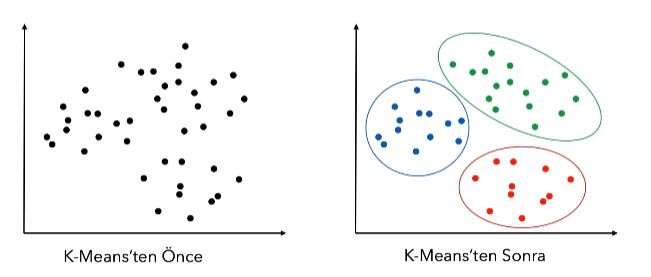

**Adım 1:** Küme sayısı belirlenir.

**Adım 2:** Rastgele k merkez seçilir.

**Adım 3:** Her gözlem için k merkezine uzaklıklar hesaplanır.

**Adım 4:** Her gözlem en yakın olduğu  merkeze yani kümeye atanır.

**Adım 5:** Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.

**Adım 6:** Bu işlem istenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamlarının,toplamının minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir. 




**Amaç** : Küme içi benzerlik maksimum olmalıdır. Kümeler arası farklılık (benzemezlik) da maksimum olmalıdır.

# Kütüphaneler

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

# Veri Seti

In [4]:
df = pd.read_csv("./USArrests.csv", index_col = 0)
df.head()
#index_col ilk columnun index olmasını sağladı

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Veri setinde eksik (null) değer var mı bakalım.

In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Veri setinin genel bilgilerine bakalım.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Verinin sayısal olarak bilgilerine bakalım.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


Grafiksel olarak bakalım.

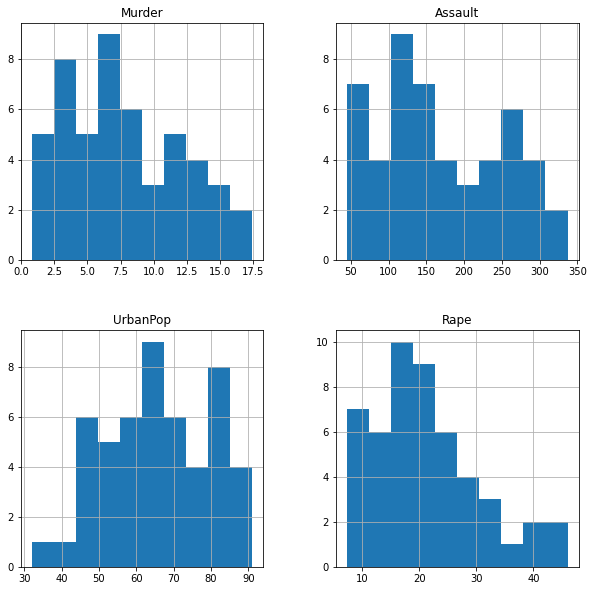

In [8]:
df.hist(figsize = (10,10));
#figsize grafiklerin boyutunu (size) belirler

K-Means i uygulayalım

In [9]:
kmeans = KMeans(n_clusters = 4)

küme sayısını 4 belirledik

In [12]:
kmeans

KMeans(n_clusters=4)

fit işlemini gerçekleştirelim

In [13]:
k_fit = kmeans.fit(df)

kontrol edelim

In [14]:
k_fit.n_clusters

4

kümelerin merkezlerine de erişebiliriz

In [15]:
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

gözlemlerin sınıf etiketlerine bakabiliriz

In [ ]:
k_fit.labels_

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int32)

# Kümelerin Görselleştirilmesi

görselleştirme kolaylığı için küme sayısnı 2 yapalım

In [17]:
k_means = KMeans(n_clusters = 2).fit(df)

In [18]:
kumeler = k_means.labels_

2 farklı küme olduğunu labellardan görebiliriz

In [20]:
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

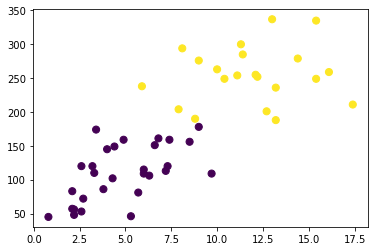

In [21]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis");


merkezleri görmeye çalışalım

In [22]:
merkezler = k_means.cluster_centers_

In [23]:
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

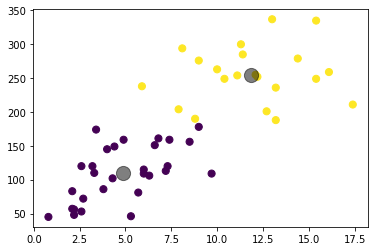

In [24]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha=0.5);

# Optimum Küme Sayısının Belirlenmesi

## Elbow Yöntemi

In [25]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [26]:
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)


Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

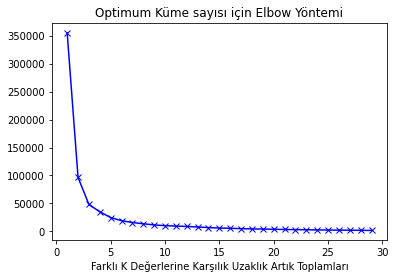

In [27]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

Kırılımın yani grafikte eğimin en dik olduğu nokta bizim için ideal k sayısıdır. Bu grafikte 2-3 gibi değer

**Farklı bir yöntem**

Gerekli olan kütüphanemizi indirelim

In [28]:
!pip install yellowbrick

In [29]:
from yellowbrick.cluster import KElbowVisualizer

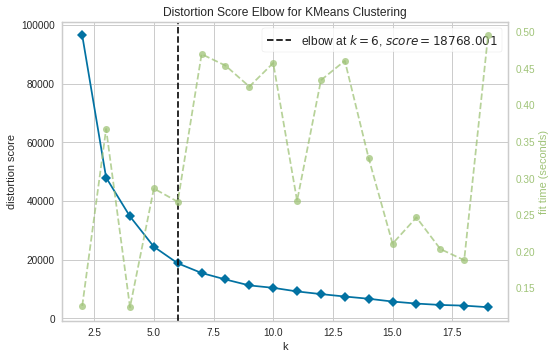

In [30]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(df)
visu.poof()

en iyi k sayısını 6 olarak verdi bir önceki grafikte manuel olarak tahmin etmemiz gerekirken burda doğrudan bize en optimum  k değerini vermiş oldu

In [31]:
kmeans = KMeans(n_clusters = 4).fit(df)
kmeans

KMeans(n_clusters=4)

hangi gözlemin hangi kümeye ait olduğunu görmek için bir dataframe oluşturalım

In [32]:
kumeler = kmeans.labels_

In [33]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,3
4,California,1
5,Colorado,3
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,3


ana veri setimizin içine kümeleride atayalım

In [34]:
df["Kume_No"] = kumeler

In [35]:
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,3


# Hiyerarşik Kümeleme

Amaç gözlemleri birbirine olan benzerliklere göre alt kümelere ayırmaktır. K-Means ten farklı olarak gözlemler daha fazla alt kümeye ayrılmak istendiğinde kullanılır. Alt alta kümeler kullanılır.

Her bir gözlem kendi bir küme oluncaya kadar alt kümelere ayrılır.

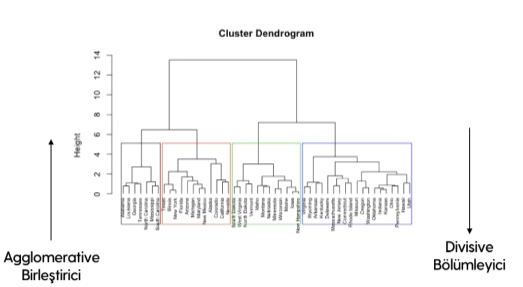

**Agglomerative Clustering**: Birleştirici.
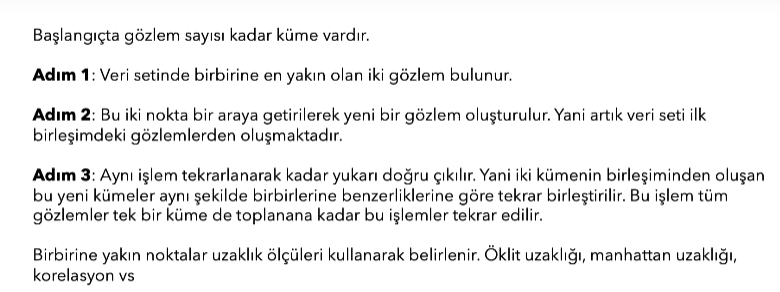


**Divise Clustering:** Bölümleyici
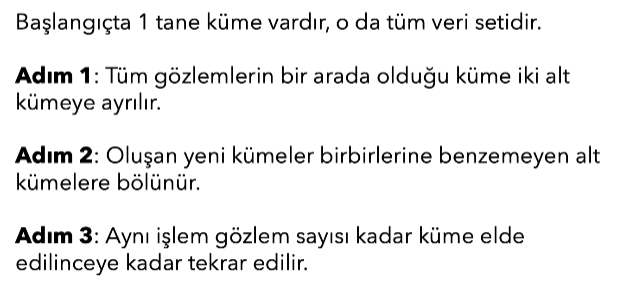

**Kümeleme Yöntemleri ile Karar Ağaçları Farkı**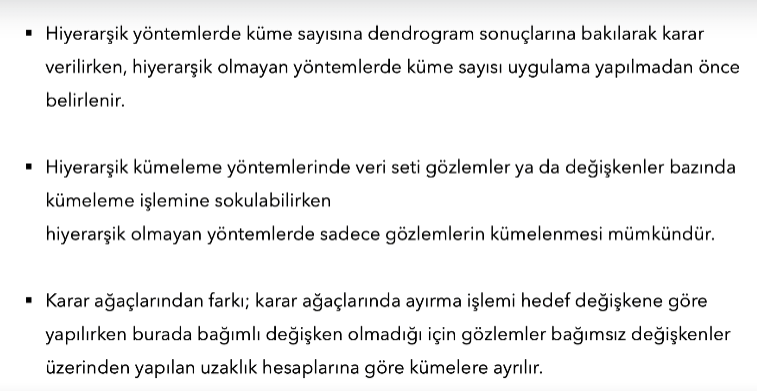**

**Uygulama**

In [38]:
from scipy.cluster.hierarchy import linkage

In [39]:
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")

In [40]:
from scipy.cluster.hierarchy import dendrogram

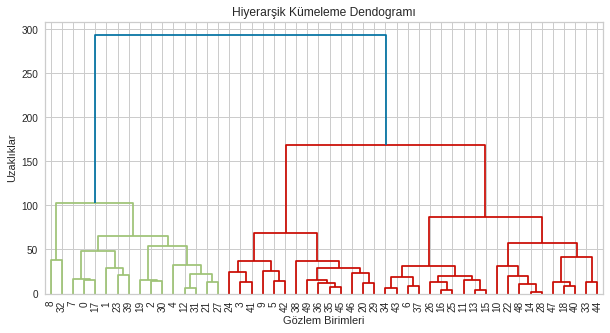

In [41]:
plt.figure(figsize = (10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
          leaf_font_size = 10);

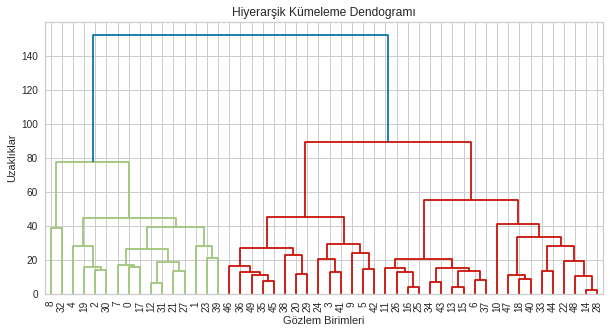

In [42]:
plt.figure(figsize = (10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
          leaf_font_size = 10);

Sadece belirli sayıda görmek için p sayıda.

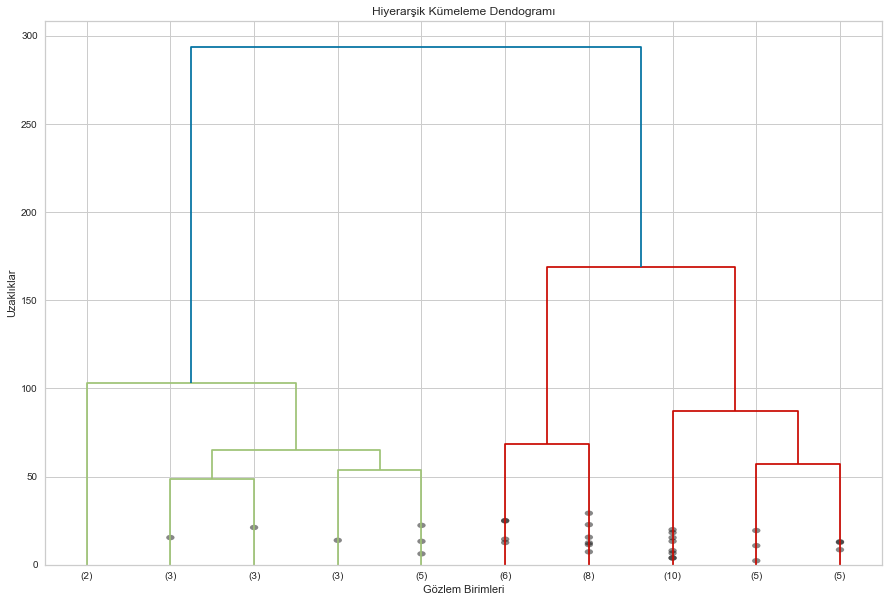

In [ ]:
plt.figure(figsize = (15,10))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
          leaf_font_size = 10);

# Temel Bileşen Analizi (Principal Component Analysis)

Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değişken ile temsil etmektir. Küçük miktarda bilgi kaybını göze alarak değişken boyutunu azaltmaktır.

Kümeleme yönteminden sonra görselleştirme yapmak için veri setinizi temel bileşen analizi ile iki boyuta indirgemeniz gerektiği durumlar oluşur.

In [44]:
df = pd.read_csv("./Hitters.csv")
df.dropna(inplace = True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


Bir standartlaştırma işlemi gerekiyor öncelikle

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
df = StandardScaler().fit_transform(df)

In [47]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [48]:
from sklearn.decomposition import PCA

2 bileşene indirgemeyi deniyelim

In [49]:
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df)

In [50]:
bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen","ikinci_bilesen"])

In [51]:
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


Bu 2 bileşenle verinin ne kadarının açıklanabilirliği olduğuna bakalım

In [52]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])

1. bileşen ile %45 2. bileşen ile %24 toplamda %70 civarı veriyi bu 2 bileşenle açıklayabiliyoruz

1.bileşene bakalım

In [ ]:
pca.components_[1]

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

**Optimum Bileşen Sayısı**

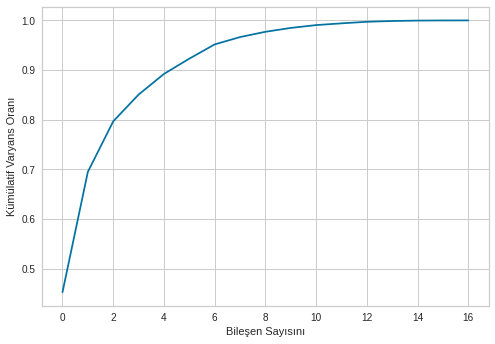

In [53]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı");

In [54]:
pca.explained_variance_ratio_

array([4.52454661e-01, 2.42468012e-01, 1.01696801e-01, 5.39343967e-02,
       4.16143455e-02, 3.08119274e-02, 2.86933912e-02, 1.47589096e-02,
       1.06379741e-02, 7.78968542e-03, 5.72654636e-03, 3.49183444e-03,
       3.16734133e-03, 1.57268674e-03, 8.27965421e-04, 2.82821576e-04,
       7.06999352e-05])

3 bileşen ile tekrar bakalım

In [56]:
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [57]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])